In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
matplotlib.style.use('ggplot')
from __future__ import unicode_literals

In [ ]:
Data = pd.read_csv('review.csv', encoding='utf-8')

In [ ]:
Data.head(20)

,Reviewer Name,Rating,Review,Date,Review_english
0,Jean-claude D.,4 étoiles,"Une place qui est tranquille, propre, bien écl...",il y a 9 mois,a place that is quiet clean well lit customers...
1,Mo Reese (MoReese77),3 étoiles,I wanted donuts the other day after being in f...,il y a 8 mois,i wanted donuts the other day after being in f...
2,Moundji MAOUI,3 étoiles,Parfait pour les lève-tot. Ouvre à 5 heures du...,il y a 9 mois,perfect for early risers opens at 5 a.m. and o...
3,Cédric Sabbe,5 étoiles,"Lieu incontournable du Québec, le Tim Hortons ...",il y a 7 mois,"a must-see place in Quebec, the Tim Hortons wi..."
4,Alex Smith,1 étoile,*Please Save your Health by not coming to this...,il y a un mois,please save your health by not coming to this ...
5,Marilou Tolentino,4 étoiles,We went there one evening on a weekend and it ...,il y a 7 mois,we went there one evening on a weekend and it ...
6,Marco L,1 étoile,This store is the worst Tim Hortons I've visit...,il y a un mois,this store is the worst tim hortons ive visite...
7,Celine St Pierre,2 étoiles,1 personne dans les lieux parlait le francais ...,il y a une semaine,1 person in the premises spoke French an elder...
8,A. D,3 étoiles,This Tim Hortons restaurant has good customer ...,il y a 4 mois,this tim hortons restaurant has good customer ...
9,Marc G,2 étoiles,"Personnel peu aimable et à peine honnête, qui ...",il y a 3 mois,unfriendly and barely honest staff who don't e...


In [ ]:
Data.columns

Index(['Reviewer Name', 'Rating', 'Review', 'Date', 'Review_english'], dtype='object')

In [ ]:
Data.dtypes

Reviewer Name     object
Rating            object
Review            object
Date              object
Review_english    object
dtype: object

In [ ]:
Reviews = Data['Review_english']
len(Reviews)

423

**Review Ranting**

In [ ]:
# Convert 'Rating' column to numeric, handling errors
Data['Rating'] = pd.to_numeric(Data['Rating'].str.replace('etoile', '').str.replace('étoiles', '').str.strip(), errors='coerce')

# Convert resulting numeric values to integers (NaN values will remain)
Data['Rating'] = Data['Rating'].astype('Int64', errors='ignore')

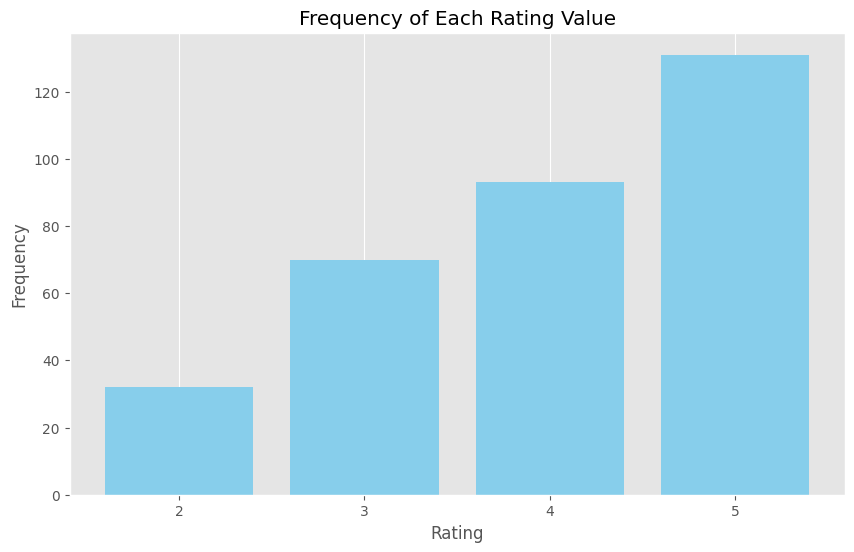

In [ ]:
import matplotlib.pyplot as plt

# Plot the frequency of each rating value
rating_counts = Data['Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index.astype(int), rating_counts.values, color='skyblue') # Convert index to integers
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Each Rating Value')
plt.xticks(rating_counts.index.astype(int)) # Convert index to integers
plt.grid(axis='y')
plt.show()

In [ ]:
from transformers import pipeline

# Initialiser le pipeline de sentiment
sentiment_pipeline = pipeline("sentiment-analysis")

def get_sentiment_advanced(review):
    if isinstance(review, str):
        # Analyser le sentiment en utilisant le modèle avancé
        result = sentiment_pipeline(review)
        # Extraire l'étiquette de sentiment
        sentiment = result[0]['label']
        # Convertir en étiquettes 'Positive', 'Negative', 'Neutral'
        if sentiment == 'POSITIVE':
            return 'Positive'
        elif sentiment == 'NEGATIVE':
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral' # ou autre gestion des valeurs non textuelles

# Appliquer l'analyse de sentiment avancée à la colonne des avis
Data['Sentiment'] = Data['Review_english'].apply(get_sentiment_advanced)

# Calculer le pourcentage de chaque sentiment
sentiment_counts = Data['Sentiment'].value_counts(normalize=True) * 100

# Display the DataFrame
print("Sentiment Analysis Results:")
print(Data)



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Sentiment Analysis Results:
            Reviewer Name  Rating  \
0          Jean-claude D.       4   
1    Mo Reese (MoReese77)       3   
2           Moundji MAOUI       3   
3            Cédric Sabbe       5   
4              Alex Smith    <NA>   
..                    ...     ...   
418         Juan Olivares       5   
419             Andrey LS       4   
420         J Gpe Mendoza       4   
421        Diverti Juegos       5   
422           rené kenter       3   

                                                Review            Date  \
0    Une place qui est tranquille, propre, bien écl...   il y a 9 mois   
1    I wanted donuts the other day after being in f...   il y a 8 mois   
2    Parfait pour les lève-tot. Ouvre à 5 heures du...   il y a 9 mois   
3    Lieu incontournable du Québec, le Tim Hortons ...   il y a 7 mois   
4    *Please Save your Health by not coming to this...  il y a un mois   
..                                                 ...             ...   
418      

In [ ]:
Data.head()

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment
0,Jean-claude D.,4,"Une place qui est tranquille, propre, bien écl...",il y a 9 mois,a place that is quiet clean well lit customers...,Positive
1,Mo Reese (MoReese77),3,I wanted donuts the other day after being in f...,il y a 8 mois,i wanted donuts the other day after being in f...,Positive
2,Moundji MAOUI,3,Parfait pour les lève-tot. Ouvre à 5 heures du...,il y a 9 mois,perfect for early risers opens at 5 a.m. and o...,Negative
3,Cédric Sabbe,5,"Lieu incontournable du Québec, le Tim Hortons ...",il y a 7 mois,"a must-see place in Quebec, the Tim Hortons wi...",Positive
4,Alex Smith,<NA>,*Please Save your Health by not coming to this...,il y a un mois,please save your health by not coming to this ...,Negative


In [ ]:
Data.to_csv('review_treated.csv',index=False)

In [ ]:
# Calculate the sentiment counts manually
positive_count = (Data['Sentiment'] == 'Positive').sum()
negative_count = (Data['Sentiment'] == 'Negative').sum()
neutral_count = (Data['Sentiment'] == 'Neutral').sum()
total_reviews = len(Data)

# Calculate percentages
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

positive_percentage, negative_percentage, neutral_percentage


(52.95508274231678, 46.808510638297875, 0.2364066193853428)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Handle potential non-string values in 'Review_French' column
all_reviews = ' '.join([str(review) for review in Data['Review_english']])

# Tokeniser les mots
words = all_reviews.split()

# Define stop words for French
stop_words = set(stopwords.words('english')) # Assuming you are working with French reviews

# Filtrer les mots pour enlever les stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

# Compter la fréquence des mots
word_counts = Counter(filtered_words)

# Afficher les 10 mots les plus fréquents
print(word_counts.most_common(10)) # Afficher les 10 mots les plus fréquents

# Enregistrer les résultats dans un fichier CSV
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# If you intend to add filtered words for each review, you'll need to adjust your approach.
# Here's one way to do it, but it depends on your specific goal:

Data['filtered_words'] = Data['Review_english'].apply(lambda review: [word for word in str(review).split() if word.lower() not in stop_words])

[('service', 103), ('good', 101), ('coffee', 89), ('tim', 57), ('place', 55), ('staff', 48), ('French', 38), ('nice', 36), ('fast', 33), ('hortons', 30)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


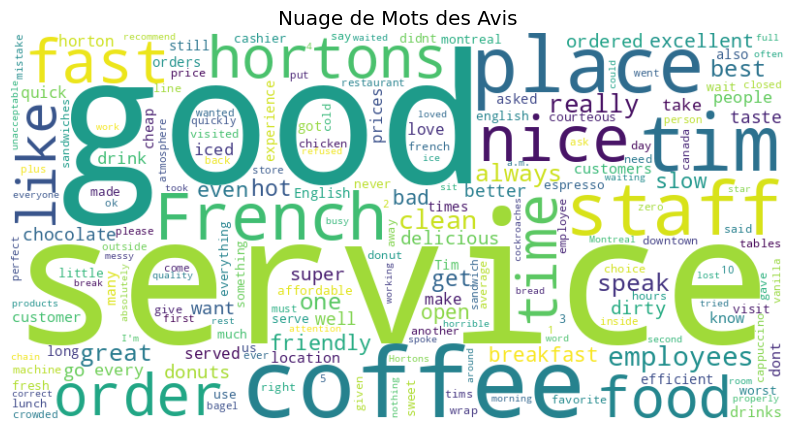

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots des Avis')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

def extract_nouns(review):
    if isinstance(review, str):
        # Create a TextBlob object
        blob = TextBlob(review)
        # Perform POS tagging
        pos_tags = blob.tags
        # Extract nouns (NN, NNS, NNP, NNPS)
        nouns = [word for word, pos in pos_tags if pos in [ 'NN', 'NNS']]
        print(nouns)
        return ' '.join(nouns)
    else:
        return ''
def correct_spelling(text):
    if isinstance(text, str): # Check if the input is a string
        blob= TextBlob(text)
        return str(blob.correct())
    else:
        return '' # Return an empty string if not a string

Data['Review_english'] = Data['Review_english'].apply(correct_spelling)
# Appliquer l'extraction des noms à la colonne des avis
Data['Nouns'] = Data['Review_english'].apply(extract_nouns)



['place', 'customers', 'line', 'rules', 'atmosphere', 'people']
['i', 'donets', 'day', 'front', 'computer', 'place', 'st', 'denis', 'crow', 'flies', 'place', 'st', 'cats']
['perfect', 'risers', 'a.m.', 'mornings', 'hand', 'quality', 'coffee', 'rest', 'babel']
['place', 'choice', 'chocolate', 'donets', 'syrupy', 'vanilla', 'calomel', 'cream', 'choice', 'filter', 'coffee']
['health', 'place', 'kitchen', 'cockroaches', 'dirty', 'i', 'norton', 'surprise', 'inspection']
['evening', 'weekend', 'tables', 'cleaning', 'staff', 'city']
['store', 'portions', 'montreal', 'visits', 'time', 'express', 'machine', 'drinks', 'machine']
['person', 'premises', 'person', 'toilet', 'one', 'person', 'complaint', 'office', 'language', 'service']
['portions', 'restaurant', 'customer', 'service', 'quick', 'staff', 'degree', 'visit']
['staff', 'hello', 'thank', 'chocolate', 'bill', 'cashier', 'colleague', 'points', 'error', 'experience', 'norton', 'others']
['ball', 'things', 'dont']
['internet', 'couture', 'ti

In [ ]:
Data.head()

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment,filtered_words,Nouns
0,Jean-claude D.,4,"Une place qui est tranquille, propre, bien écl...",il y a 9 mois,a place that is quiet clean well lit customers...,Positive,"[place, quiet, clean, well, lit, customers, al...",place customers line rules atmosphere people
1,Mo Reese (MoReese77),3,I wanted donuts the other day after being in f...,il y a 8 mois,i wanted donets the other day after being in f...,Positive,"[wanted, donuts, day, front, computer, long, p...",i donets day front computer place st denis cro...
2,Moundji MAOUI,3,Parfait pour les lève-tot. Ouvre à 5 heures du...,il y a 9 mois,perfect for early risers opens at 5 a.m. and o...,Negative,"[perfect, early, risers, opens, 5, a.m., Satur...",perfect risers a.m. mornings hand quality coff...
3,Cédric Sabbe,5,"Lieu incontournable du Québec, le Tim Hortons ...",il y a 7 mois,"a must-see place in Quebec, the Him Portions w...",Positive,"[must-see, place, Quebec,, Tim, Hortons, wide,...",place choice chocolate donets syrupy vanilla c...
4,Alex Smith,<NA>,*Please Save your Health by not coming to this...,il y a un mois,please save your health by not coming to this ...,Negative,"[please, save, health, coming, place, kitchen,...",health place kitchen cockroaches dirty i norto...


['service', 'coffee', 'place', 'staff', 'i', 'time', 'tim', 'order', 'portions', 'food', 'employees', 'ice', 'breakfast', 'donets', 'times', 'chocolate', 'prices', 'people', 'customers', 'customer', 'drinks', 'location', 'norton', 'experience', 'cashier', 'orders', 'price', 'something', 'employee', 'line', 'dont', 'cappuccino', 'choice', 'cockroaches', 'bathroom', 'montreal', 'taste', 'everything', 'chicken', 'fast', 'tables', 'drink', 'hours', 'day', 'machine', 'babel', 'store', 'cream', 'bread', 'vanilla', 'lunch', 'morning', 'person', 'counter', 'visit', 'dirty', 'star', 'canada', 'view', 'street', 'bit', 'sandwich', 'restaurant', 'express', 'quality', 'products', 'city', 'one', 'cash', 'wrap', 'everyone', 'attention', 'tea', 'lot', 'mistake', 'wife', 'minutes', 'perfect', 'word', 'owner', 'excellent', 'nothing', 'room', 'way', 'cup', 'chain', 'door', 'girls', 'places', 'half', 'things', 'sugar', 'fastfood', 'attitude', 'break', 'fact', 'stars', 'club', 'course', 'night', 'internet'

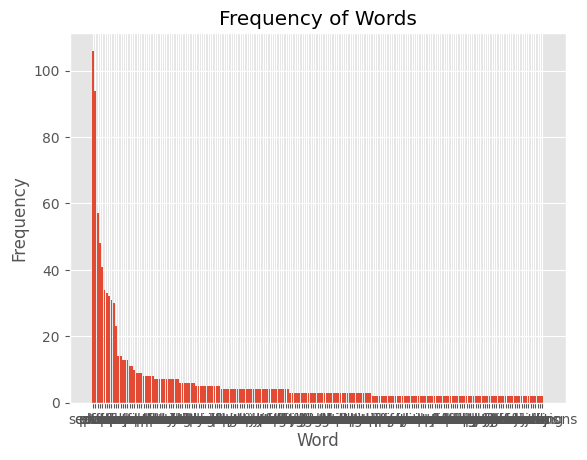

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the word counts for each word in the Nouns column
word_counts = pd.Series(' '.join(Data['Nouns']).split()).value_counts()

# Filter out words with count less than or equal to 1
# This addresses the original intent of the if statement
word_counts = word_counts[word_counts > 1]

# Sort the word counts in descending order
sorted_word_counts = word_counts.sort_values(ascending=False)
print(list( sorted_word_counts.index))
# Plot the word counts as a bar chart
plt.bar(sorted_word_counts.index, sorted_word_counts.values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Frequency of Words')
plt.show() # Added to display the plot

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialiser l'analyseur de sentiment VADER
analyzer = SentimentIntensityAnalyzer()

# Définir les mots-clés pour chaque catégorie
keywords = {
    'staff': ['staff','cashier','employees', 'employee', 'workers', 'service', 'attitude'],
    'cuisine': ['food','portions', 'cappuccino', 'chocolate','cuisine', 'repas', 'plat', 'coffee', 'drinks', 'breakfast', 'lunch', 'meal', 'milk','dinner','tea' ,'cinnamon','sandwich','express', 'vanilla','menu', 'taste'],
    'cleanliness': ['clean','bathroom','machine' ,'cockroaches','propreté', 'propre', 'sale', 'hygienic', 'dirty', 'cleaning','toilet'],

}

def get_sentiment_vader(text):
    if isinstance(text, str):
        # Analyse de sentiment avec VADER
        vs = analyzer.polarity_scores(text)
        # Déterminer le sentiment basé sur les scores de polarité
        if vs['compound'] >= 0.05:
            return 'Positive'
        elif vs['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

def filter_reviews_by_keywords(review, keywords):
    words = review.split()
    filtered_review = ' '.join([word for word in words if word.lower() in keywords])
    return filtered_review

def analyze_sentiment_by_category(data, keywords):
    for category, words in keywords.items():
        data[category + '_filtered'] = data['Review_english'].apply(lambda review: filter_reviews_by_keywords(review, words))
        data[category + '_sentiment'] = data[category + '_filtered'].apply(get_sentiment_vader)
    return data

# Appliquer l'analyse de sentiment par catégorie
data = analyze_sentiment_by_category(Data, keywords)

# Afficher les résultats
print("Sentiment Analysis Results:")
print(Data.head())

# Sauvegarder les résultats dans un nouveau fichier CSV
output_file_path = 'review_with_sentiment_by_category.csv'
data.to_csv(output_file_path, index=False)


Sentiment Analysis Results:
          Reviewer Name  Rating  \
0        Jean-claude D.       4   
1  Mo Reese (MoReese77)       3   
2         Moundji MAOUI       3   
3          Cédric Sabbe       5   
4            Alex Smith    <NA>   

                                              Review            Date  \
0  Une place qui est tranquille, propre, bien écl...   il y a 9 mois   
1  I wanted donuts the other day after being in f...   il y a 8 mois   
2  Parfait pour les lève-tot. Ouvre à 5 heures du...   il y a 9 mois   
3  Lieu incontournable du Québec, le Tim Hortons ...   il y a 7 mois   
4  *Please Save your Health by not coming to this...  il y a un mois   

                                      Review_english Sentiment  \
0  a place that is quiet clean well lit customers...  Positive   
1  i wanted donets the other day after being in f...  Positive   
2  perfect for early risers opens at 5 a.m. and o...  Negative   
3  a must-see place in Quebec, the Him Portions w...  Positive  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


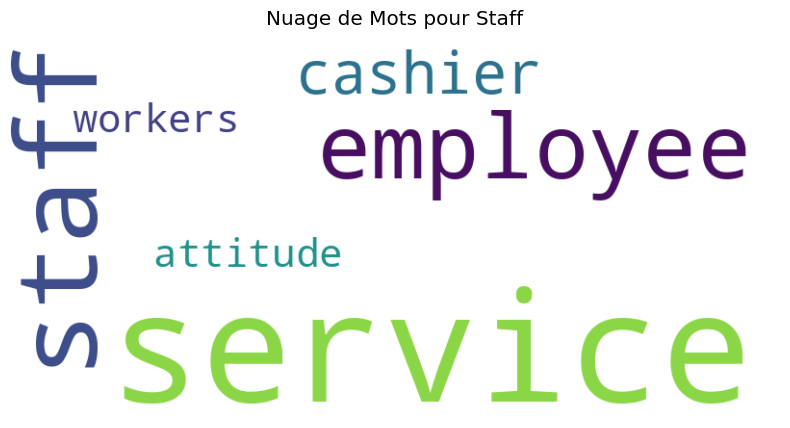

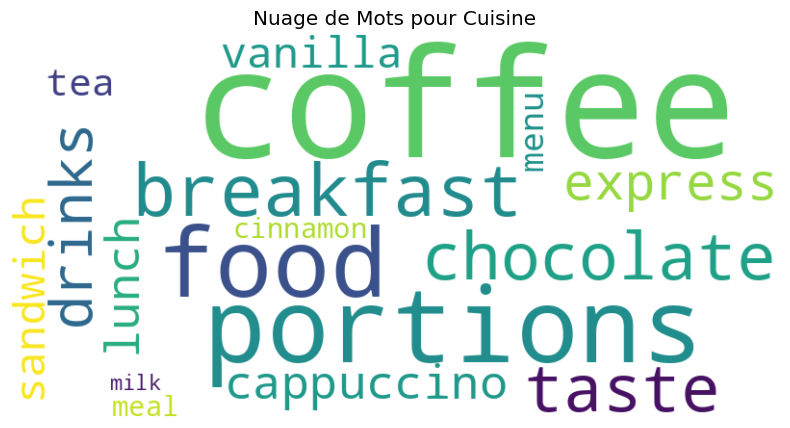

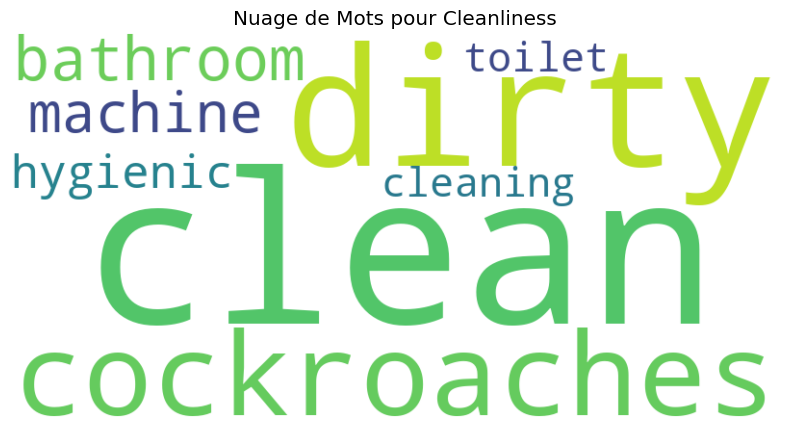

In [ ]:
def filter_reviews_by_keywords(review, keywords):
    words = review.split()
    filtered_review = ' '.join([word for word in words if word.lower() in keywords])
    return filtered_review

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filtrer les avis par catégorie et générer les nuages de mots
for category, words in keywords.items():
    data[category + '_filtered'] = data['Review_english'].apply(lambda review: filter_reviews_by_keywords(review, words))
    category_text = ' '.join(data[category + '_filtered'])
    generate_wordcloud(category_text, f'Nuage de Mots pour {category.capitalize()}')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


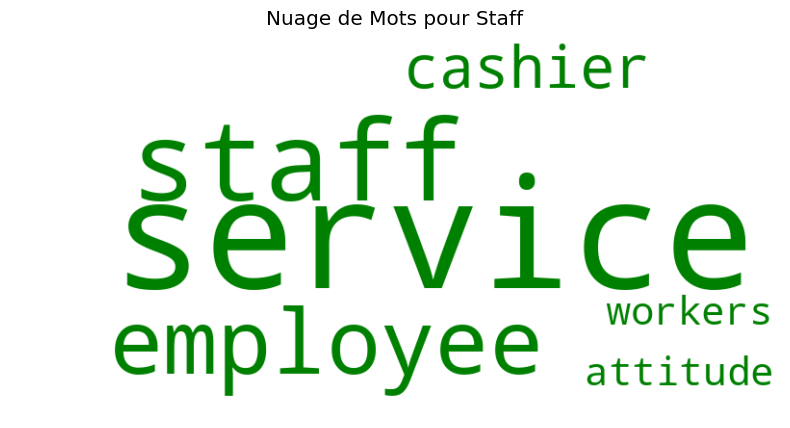

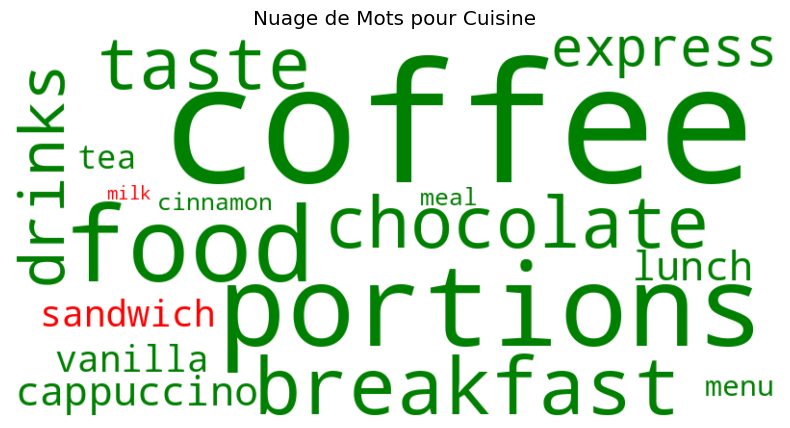

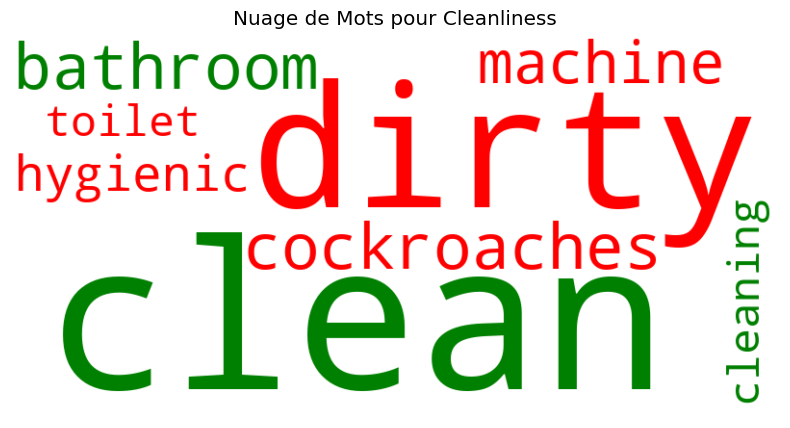

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
# Initialiser le pipeline de sentiment
sentiment_pipeline = pipeline("sentiment-analysis")
def filter_reviews_by_keywords(review, keywords):
    words = review.split()
    filtered_review = ' '.join([word for word in words if word.lower() in keywords])
    return filtered_review

def analyze_word_sentiment(word):
    result = sentiment_pipeline(word)
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

def generate_color(word, font_size, position, orientation, random_state=None, **kwargs): # Added necessary parameters
    sentiment = analyze_word_sentiment(word)
    if sentiment == 'Positive':
        return 'green'
    elif sentiment == 'Negative':
        return 'red'
    else:
        return 'gray'

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud.recolor(color_func=generate_color), interpolation='bilinear') # Removed sentiment_scores
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filtrer les avis par catégorie et générer les nuages de mots
for category, words in keywords.items():
    data[category + '_filtered'] = data['Review_english'].apply(lambda review: filter_reviews_by_keywords(review, words))
    category_text = ' '.join(data[category + '_filtered'])
    generate_wordcloud(category_text, f'Nuage de Mots pour {category.capitalize()}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


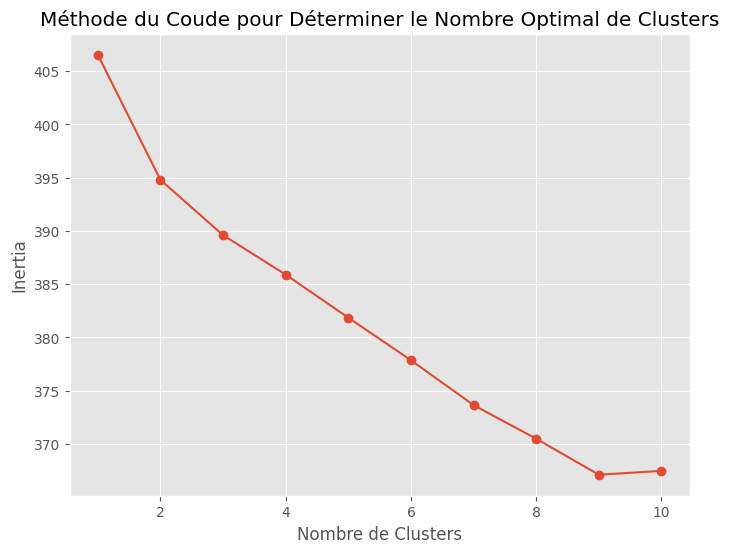

In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text


Data['Cleaned Review'] = Data['Review_english'].apply(lambda x: clean_text(str(x)))

# Transformer les avis en vecteurs TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Data['Cleaned Review'])

# Déterminer le nombre optimal de clusters en utilisant la méthode du coude
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertia')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.show()



Cluster 0 mots-clés : ['want', 'mistake', 'served', 'times', 'employees', 'english', 'service', 'speak', 'order', 'french']
Cluster 1 mots-clés : ['food', 'really', 'louse', 'good', 'staff', 'customer', 'bad', 'excellent', 'slow', 'service']
Cluster 2 mots-clés : ['service', 'great', 'food', 'clean', 'super', 'good', 'fast', 'place', 'nice', 'coffee']
Cluster 3 mots-clés : ['just', 'place', 'love', 'time', 'like', 'delicious', 'open', 'staff', 'portions', 'tim']
Cluster 4 mots-clés : ['donets', 'chocolate', 'place', 'price', 'prices', 'fast', 'food', 'service', 'coffee', 'good']


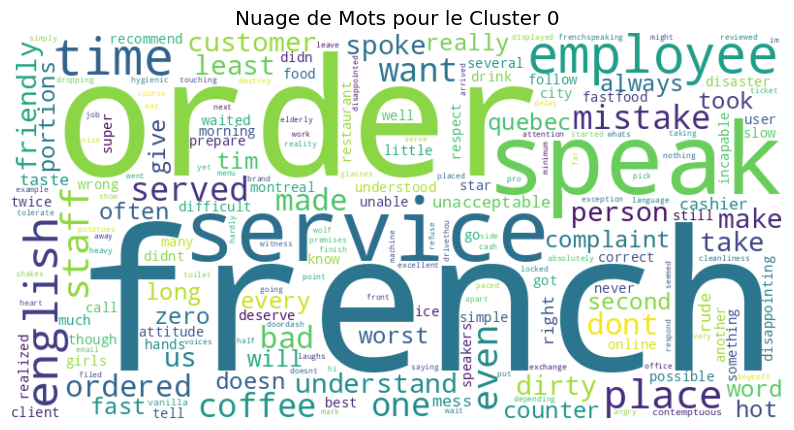

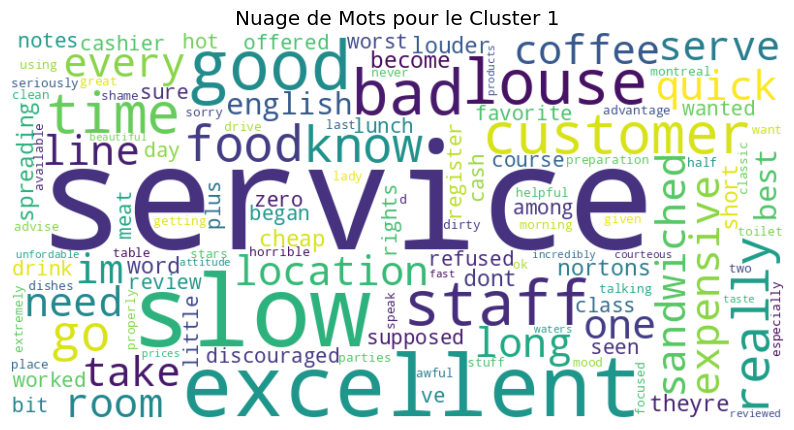

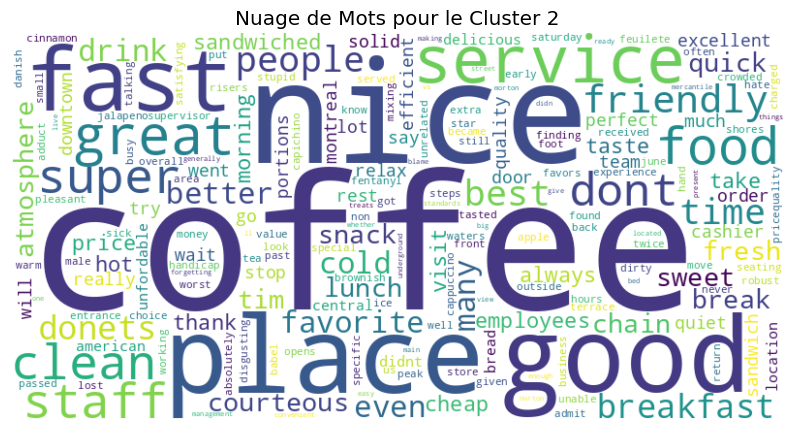

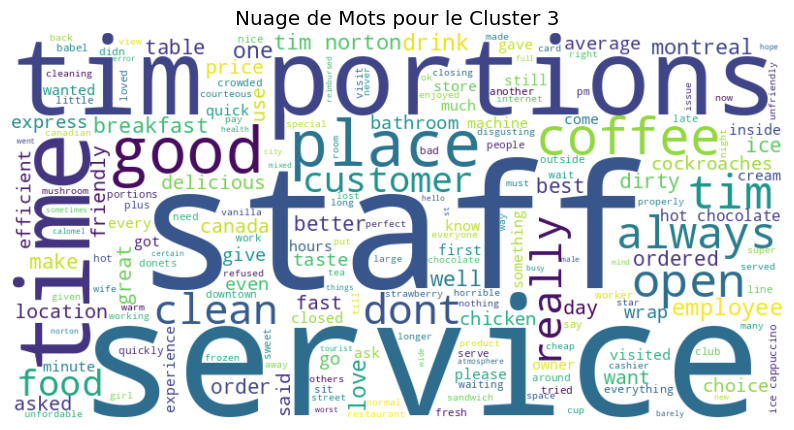

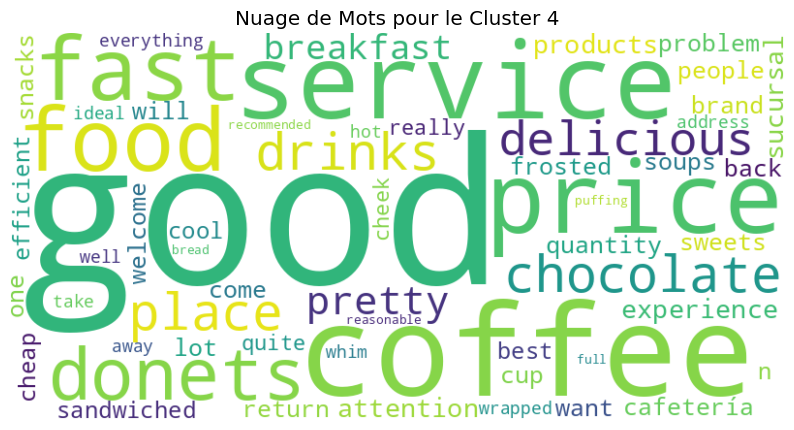

In [ ]:
# Appliquer K-means avec le nombre optimal de clusters (par exemple, 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
Data['Cluster'] = kmeans.fit_predict(X)

# Afficher les mots-clés pour chaque cluster
terms = vectorizer.get_feature_names_out()
for i in range(optimal_clusters):
    centroid_terms = kmeans.cluster_centers_[i].argsort()[-10:]
    print(f"Cluster {i} mots-clés : {[terms[ind] for ind in centroid_terms]}")

# Créer un nuage de mots pour chaque cluster
for i in range(optimal_clusters):
    cluster_reviews = Data[Data['Cluster'] == i]['Cleaned Review']
    all_text = ' '.join(cluster_reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuage de Mots pour le Cluster {i}')
    plt.show()

In [ ]:
Data.head()

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment,filtered_words,Nouns,staff_filtered,staff_sentiment,cuisine_filtered,cuisine_sentiment,cleanliness_filtered,cleanliness_sentiment,Cleaned Review,Cluster
0,Jean-claude D.,4,"Une place qui est tranquille, propre, bien écl...",il y a 9 mois,a place that is quiet clean well lit customers...,Positive,"[place, quiet, clean, well, lit, customers, al...",place customers line rules atmosphere people,,Neutral,,Neutral,clean,Positive,a place that is quiet clean well lit customers...,3
1,Mo Reese (MoReese77),3,I wanted donuts the other day after being in f...,il y a 8 mois,i wanted donets the other day after being in f...,Positive,"[wanted, donuts, day, front, computer, long, p...",i donets day front computer place st denis cro...,,Neutral,,Neutral,,Neutral,i wanted donets the other day after being in f...,3
2,Moundji MAOUI,3,Parfait pour les lève-tot. Ouvre à 5 heures du...,il y a 9 mois,perfect for early risers opens at 5 a.m. and o...,Negative,"[perfect, early, risers, opens, 5, a.m., Satur...",perfect risers a.m. mornings hand quality coff...,,Neutral,coffee,Neutral,,Neutral,perfect for early risers opens at am and on s...,2
3,Cédric Sabbe,5,"Lieu incontournable du Québec, le Tim Hortons ...",il y a 7 mois,"a must-see place in Quebec, the Him Portions w...",Positive,"[must-see, place, Quebec,, Tim, Hortons, wide,...",place choice chocolate donets syrupy vanilla c...,,Neutral,Portions chocolate vanilla express,Neutral,,Neutral,a mustsee place in quebec the him portions wit...,3
4,Alex Smith,<NA>,*Please Save your Health by not coming to this...,il y a un mois,please save your health by not coming to this ...,Negative,"[please, save, health, coming, place, kitchen,...",health place kitchen cockroaches dirty i norto...,,Neutral,,Neutral,cockroaches dirty,Negative,please save your health by not coming to this ...,3


In [ ]:
Data[['Rating','Cluster']].corr()

,Rating,Cluster
Rating,1.000000,0.225172
Cluster,0.225172,1.000000


Classifier les avis en positifs ou négatifs selon la date,

In [ ]:

from datetime import datetime
from transformers import pipeline

# Charger le modèle pré-entraîné pour l'analyse de sentiment
sentiment_analysis = pipeline("sentiment-analysis")

# Fonction pour déterminer le sentiment
def get_sentiment(review):
    result = sentiment_analysis(review[:512])  # Limiter à 512 tokens
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
import pandas as pd
import re
from datetime import datetime, timedelta

# Fonction pour convertir les dates en jours
def convert_to_days(date_str):
    # Remplacer 'un' par '1'
    date_str = date_str.replace('un', '1').replace('une', '1')

    today = datetime.now()

    match = re.search(r'(\d+)\s*(jour|jours|mois|an|année|années)', date_str)
    if match:
        num = int(match.group(1))
        unit = match.group(2)

        if 'jour' in unit:
            return num
        elif 'mois' in unit:
            past_date = today - pd.DateOffset(months=num)
            return (today - past_date).days
        elif 'an' in unit or 'année' in unit or 'années' in unit:
            return num * 365
    return None

In [ ]:
Data['Date_in_days'] = Data['Date'].apply(convert_to_days)


In [ ]:
Data.head(20)

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment,filtered_words,Nouns,staff_filtered,staff_sentiment,cuisine_filtered,cuisine_sentiment,cleanliness_filtered,cleanliness_sentiment,Cleaned Review,Cluster,Date_in_days
0,Jean-claude D.,4,"Une place qui est tranquille, propre, bien écl...",il y a 9 mois,a place that is quiet clean well lit customers...,Positive,"[place, quiet, clean, well, lit, customers, al...",place customers line rules atmosphere people,,Neutral,,Neutral,clean,Positive,a place that is quiet clean well lit customers...,3,274.0
1,Mo Reese (MoReese77),3,I wanted donuts the other day after being in f...,il y a 8 mois,i wanted donets the other day after being in f...,Positive,"[wanted, donuts, day, front, computer, long, p...",i donets day front computer place st denis cro...,,Neutral,,Neutral,,Neutral,i wanted donets the other day after being in f...,3,244.0
2,Moundji MAOUI,3,Parfait pour les lève-tot. Ouvre à 5 heures du...,il y a 9 mois,perfect for early risers opens at 5 a.m. and o...,Negative,"[perfect, early, risers, opens, 5, a.m., Satur...",perfect risers a.m. mornings hand quality coff...,,Neutral,coffee,Neutral,,Neutral,perfect for early risers opens at am and on s...,2,274.0
3,Cédric Sabbe,5,"Lieu incontournable du Québec, le Tim Hortons ...",il y a 7 mois,"a must-see place in Quebec, the Him Portions w...",Positive,"[must-see, place, Quebec,, Tim, Hortons, wide,...",place choice chocolate donets syrupy vanilla c...,,Neutral,Portions chocolate vanilla express,Neutral,,Neutral,a mustsee place in quebec the him portions wit...,3,213.0
4,Alex Smith,<NA>,*Please Save your Health by not coming to this...,il y a un mois,please save your health by not coming to this ...,Negative,"[please, save, health, coming, place, kitchen,...",health place kitchen cockroaches dirty i norto...,,Neutral,,Neutral,cockroaches dirty,Negative,please save your health by not coming to this ...,3,31.0
5,Marilou Tolentino,4,We went there one evening on a weekend and it ...,il y a 7 mois,we went there one evening on a weekend and it ...,Negative,"[went, one, evening, weekend, busy, tables, pr...",evening weekend tables cleaning staff city,staff,Neutral,,Neutral,cleaning,Neutral,we went there one evening on a weekend and it ...,3,213.0
6,Marco L,<NA>,This store is the worst Tim Hortons I've visit...,il y a un mois,this store is the worst tim portions give visi...,Negative,"[store, worst, tim, hortons, ive, visited, mon...",store portions montreal visits time express ma...,,Neutral,portions express drinks,Neutral,machine machine,Neutral,this store is the worst tim portions give visi...,3,31.0
7,Celine St Pierre,2,1 personne dans les lieux parlait le francais ...,il y a une semaine,1 person in the premises spoke French an elder...,Negative,"[1, person, premises, spoke, French, elderly, ...",person premises person toilet one person compl...,service,Neutral,,Neutral,toilet,Neutral,person in the premises spoke french an elderl...,0,NaN
8,A. D,3,This Tim Hortons restaurant has good customer ...,il y a 4 mois,this tim portions restaurant has good customer...,Positive,"[tim, hortons, restaurant, good, customer, ser...",portions restaurant customer service quick sta...,service staff,Neutral,portions,Neutral,,Neutral,this tim portions restaurant has good customer...,3,122.0
9,Marc G,2,"Personnel peu aimable et à peine honnête, qui ...",il y a 3 mois,unfriendly and barely honest staff who don't e...,Negative,"[unfriendly, barely, honest, staff, even, say,...",staff hello thank chocolate bill cashier colle...,staff cashier,Neutral,chocolate,Neutral,,Neutral,unfriendly and barely honest staff who dont ev...,3,92.0


In [ ]:

# Fonction pour déterminer le sentiment
def get_sentiment(review):
    result = sentiment_analysis(review[:512])  # Limiter à 512 tokens
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

# Ajouter une colonne pour le sentiment
Data['Sentiment'] = Data['Review'].apply(get_sentiment)

# Vérifier le type de données de la colonne 'Date_in_days'
print(Data['Date_in_days'])

# Classifier les avis par jour
reviews_by_date_sorted = Data.groupby('Date_in_days').apply(lambda x: x['Sentiment'].value_counts()).unstack().fillna(0).sort_index()
print(reviews_by_date_sorted)
# Enregistrer les résultats dans un nouveau fichier CSV
output_file_path = 'reviews_by_date.csv'
reviews_by_date_sorted.to_csv(output_file_path)

print('Les avis ont été classés par date et enregistrés dans le fichier reviews_by_date.csv')

0       274.0
1       244.0
2       274.0
3       213.0
4        31.0
        ...  
418     365.0
419    1825.0
420    1825.0
421    2190.0
422    1825.0
Name: Date_in_days, Length: 423, dtype: float64
Sentiment     Negative  Positive
Date_in_days                    
31.0               4.0       0.0
61.0               3.0       0.0
92.0               3.0       2.0
122.0              2.0       1.0
152.0              5.0       2.0
183.0              6.0       3.0
213.0              4.0       8.0
244.0              8.0       5.0
274.0              6.0       3.0
305.0              7.0       4.0
336.0              4.0       2.0
365.0             30.0      30.0
730.0             32.0      22.0
1095.0             8.0      10.0
1460.0            16.0      33.0
1825.0            27.0      51.0
2190.0            11.0      32.0
2555.0            14.0      21.0
2920.0             1.0       0.0
Les avis ont été classés par date et enregistrés dans le fichier reviews_by_date.csv


In [ ]:
reviews_by_date_sorted.index

Index([  31.0,   61.0,   92.0,  122.0,  152.0,  183.0,  213.0,  244.0,  274.0,
        305.0,  336.0,  365.0,  730.0, 1095.0, 1460.0, 1825.0, 2190.0, 2555.0,
       2920.0],
      dtype='float64', name='Date_in_days')

<Figure size 1200x600 with 0 Axes>

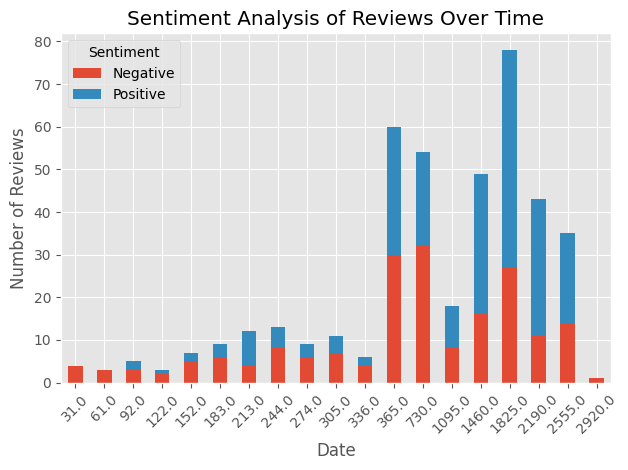

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
reviews_by_date_sorted.plot(kind='bar', stacked=True)
plt.title('Sentiment Analysis of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()

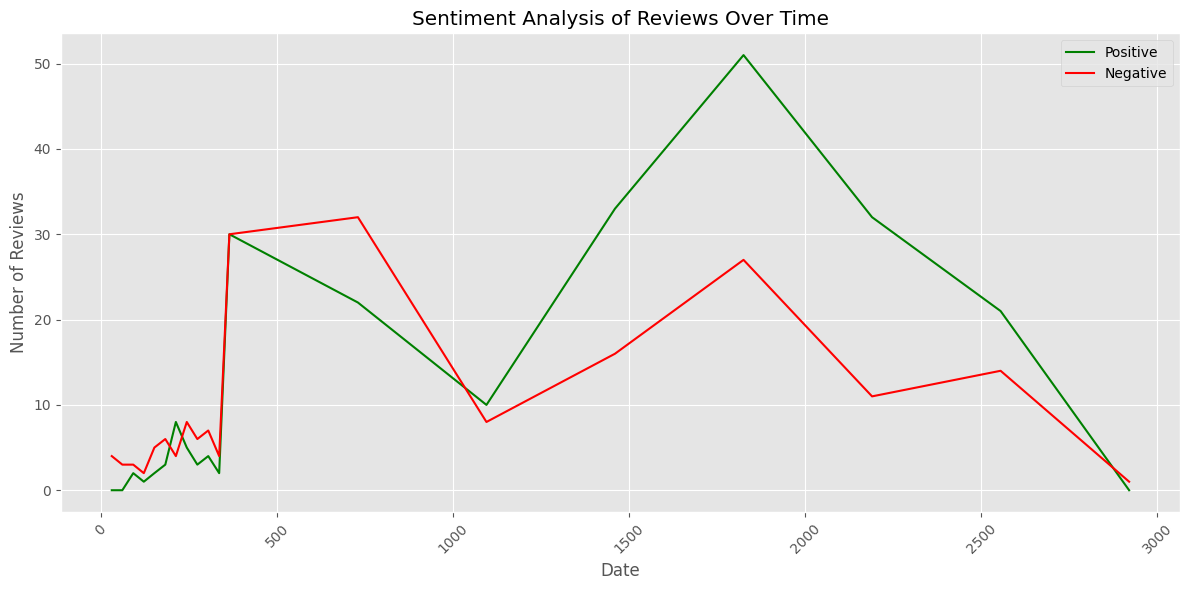

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(reviews_by_date_sorted.index, reviews_by_date_sorted['Positive'], label='Positive', color='green')
plt.plot(reviews_by_date_sorted.index, reviews_by_date_sorted['Negative'], label='Negative', color='red')
plt.xlabel('Date')  # Changed label to reflect datetime index
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

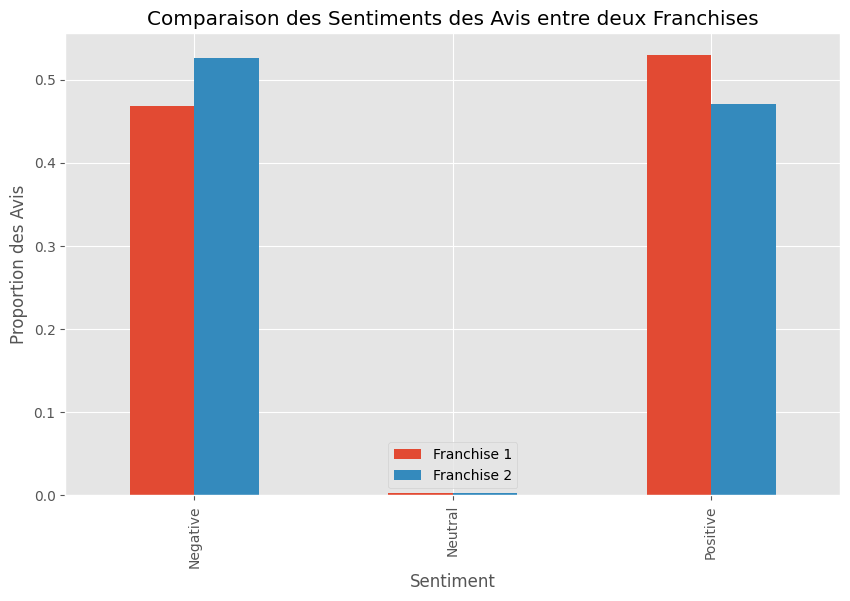

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données des franchises
data_franchise1 = pd.read_csv('review.csv')
data_franchise2 = pd.read_csv('review_peel.csv')

def get_sentiment(review):
    if isinstance(review, str):  # Check if review is a string
        result = sentiment_analysis(review[:512])  # Limiter à 512 tokens if it is
        sentiment = result[0]['label']
        if sentiment == 'POSITIVE':
            return 'Positive'
        elif sentiment == 'NEGATIVE':
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Return 'Neutral' for non-string reviews (e.g., NaN)

# Analyser les sentiments pour chaque franchise
data_franchise1['Sentiment'] = data_franchise1['Review_english'].apply(get_sentiment)
data_franchise2['Sentiment'] = data_franchise2['Review_english'].apply(get_sentiment)

# Comparer les sentiments
sentiments_franchise1 = data_franchise1['Sentiment'].value_counts(normalize=True)
sentiments_franchise2 = data_franchise2['Sentiment'].value_counts(normalize=True)

# Visualiser la comparaison
sentiments = pd.DataFrame({
    'Franchise 1': sentiments_franchise1,
    'Franchise 2': sentiments_franchise2
}).fillna(0)

sentiments.plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison des Sentiments des Avis entre deux Franchises')
plt.ylabel('Proportion des Avis')
plt.show()


In [ ]:
data_franchise1['Date_in_days'] = data_franchise1['Date'].apply(convert_to_days)
data_franchise2['Date_in_days'] = data_franchise2['Date'].apply(convert_to_days)

In [ ]:
data_franchise1['Category'] = data_franchise1['Review'].apply(get_sentiment_vader)
data_franchise2['Category'] = data_franchise2['Review'].apply(get_sentiment_vader)

In [ ]:

# Supprimer les lignes avec des dates non valides
data_franchise1.dropna(subset=['Date_in_days'], inplace=True)
data_franchise2.dropna(subset=['Date_in_days'], inplace=True)
# Classifier les avis par jour et par catégorie
reviews_by_category_date1 = data_franchise1.groupby(['Date_in_days', 'Category']).apply(lambda x: x['Sentiment'].value_counts()).unstack().fillna(0)
reviews_by_category_date2 = data_franchise2.groupby(['Date_in_days', 'Category']).apply(lambda x: x['Sentiment'].value_counts()).unstack().fillna(0)

# Visualisation des résultats
for category in keywords.keys():
    category_data = reviews_by_category_date.xs(category, level='Category', drop_level=False)
    category_data.plot(kind='bar', stacked=True, figsize=(15, 7), title=f"Sentiments over time for {category}")
    plt.ylabel('Number of Reviews')
    plt.xlabel('Date in Days')
    plt.show()

print('Les avis ont été classés par catégorie et par date, et enregistrés dans le fichier reviews_by_category_date.csv')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


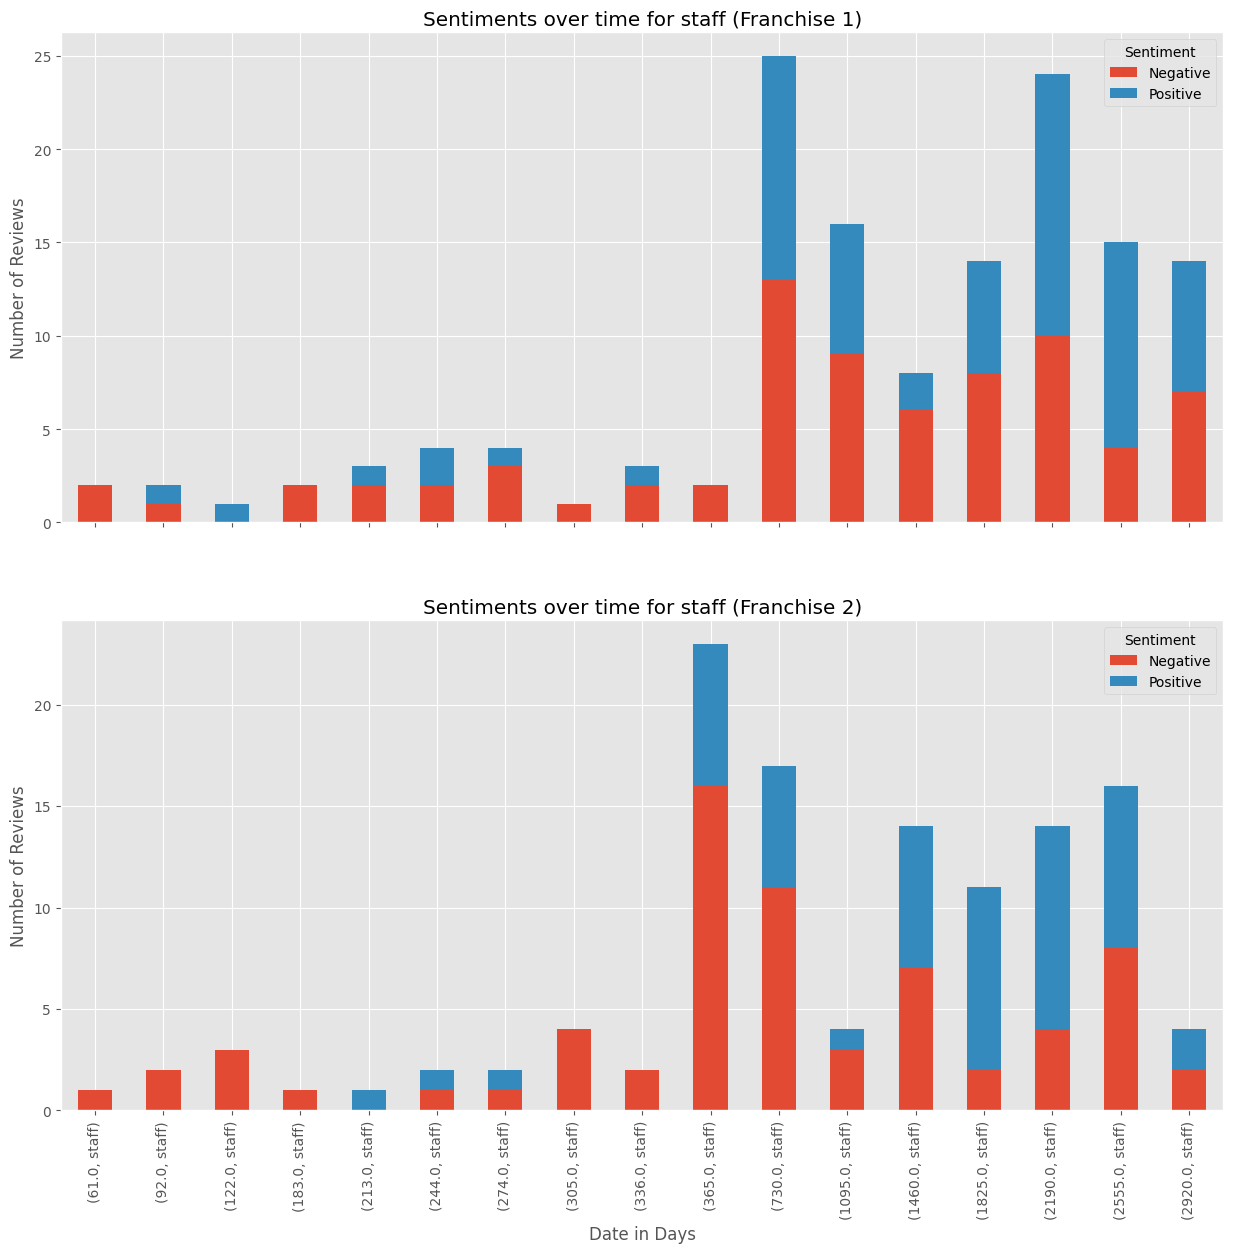

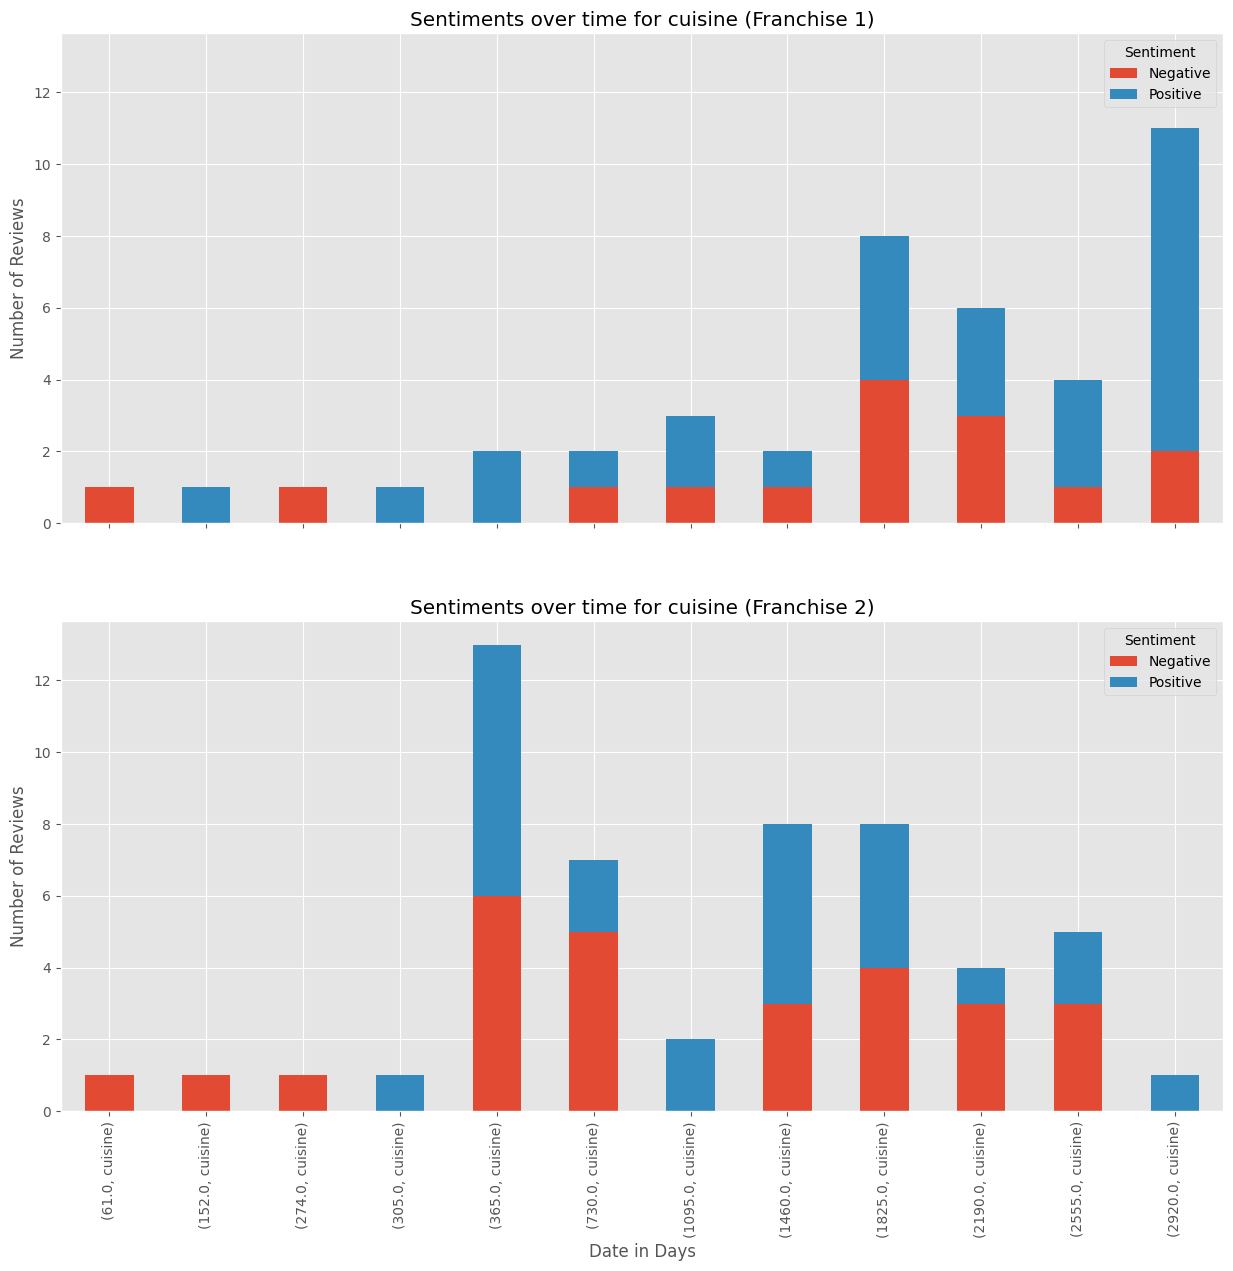

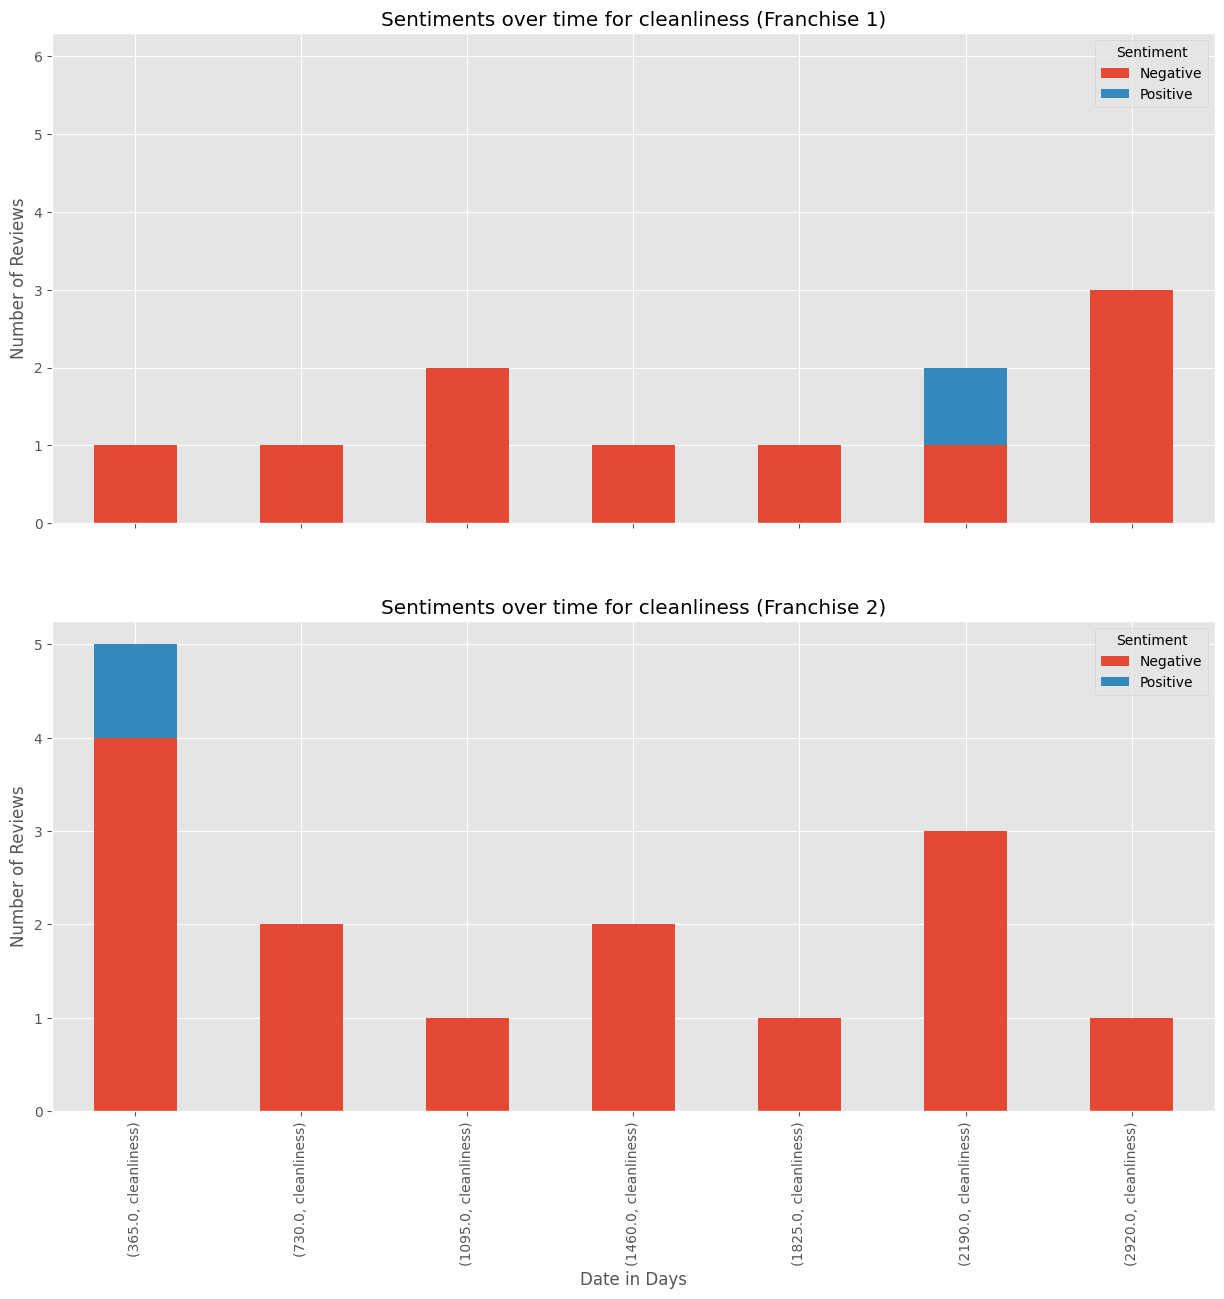

Les avis ont été classés par catégorie et par date, et les résultats ont été visualisés.


In [ ]:

# Fonction pour classifier les avis par catégorie
def classify_review(review):
    review = review.lower()
    for category, words in keywords.items():
        if any(word in review for word in words):
            return category
    return 'other'

data_franchise1['Category'] = data_franchise1['Review'].apply(classify_review)
data_franchise2['Category'] = data_franchise2['Review'].apply(classify_review)

# Initialiser le modèle de sentiment
sentiment_analysis = pipeline('sentiment-analysis')

# Fonction pour déterminer le sentiment
def get_sentiment(review):
    result = sentiment_analysis(review[:512])  # Limiter à 512 tokens
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

# Ajouter une colonne pour le sentiment
data_franchise1['Sentiment'] = data_franchise1['Review'].apply(get_sentiment)
data_franchise2['Sentiment'] = data_franchise2['Review'].apply(get_sentiment)

# Supprimer les lignes avec des dates non valides
data_franchise1.dropna(subset=['Date_in_days'], inplace=True)
data_franchise2.dropna(subset=['Date_in_days'], inplace=True)

# Classifier les avis par jour et par catégorie
reviews_by_category_date1 = data_franchise1.groupby(['Date_in_days', 'Category']).apply(lambda x: x['Sentiment'].value_counts()).unstack().fillna(0)
reviews_by_category_date2 = data_franchise2.groupby(['Date_in_days', 'Category']).apply(lambda x: x['Sentiment'].value_counts()).unstack().fillna(0)

# Enregistrer les résultats dans de nouveaux fichiers CSV
reviews_by_category_date1.to_csv('reviews_by_category_date1.csv')
reviews_by_category_date2.to_csv('reviews_by_category_date2.csv')

# Visualisation des résultats
categories = keywords.keys()
for category in categories:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 14), sharex=True)

    # Franchise 1
    category_data1 = reviews_by_category_date1.xs(category, level='Category', drop_level=False)
    category_data1.plot(kind='bar', stacked=True, ax=axes[0], title=f"Sentiments over time for {category} (Franchise 1)")
    axes[0].set_ylabel('Number of Reviews')
    axes[0].set_xlabel('Date in Days')

    # Franchise 2
    category_data2 = reviews_by_category_date2.xs(category, level='Category', drop_level=False)
    category_data2.plot(kind='bar', stacked=True, ax=axes[1], title=f"Sentiments over time for {category} (Franchise 2)")
    axes[1].set_ylabel('Number of Reviews')
    axes[1].set_xlabel('Date in Days')

    plt.show()

print('Les avis ont été classés par catégorie et par date, et les résultats ont été visualisés.')

Mots les plus fréquents dans les avis négatifs: [('00', 1), ('10', 1), ('10h30', 1), ('11', 1), ('11pm', 1), ('15', 1), ('15minutes', 1), ('16h30', 1), ('19', 1), ('20', 1)]
  Problème                                     Recommandation  Priorité
0  service  Former le personnel pour améliorer l'interacti...         1
1  qualité  Assurer un contrôle de qualité plus rigoureux ...         2
2  attente  Optimiser les processus pour réduire le temps ...         3


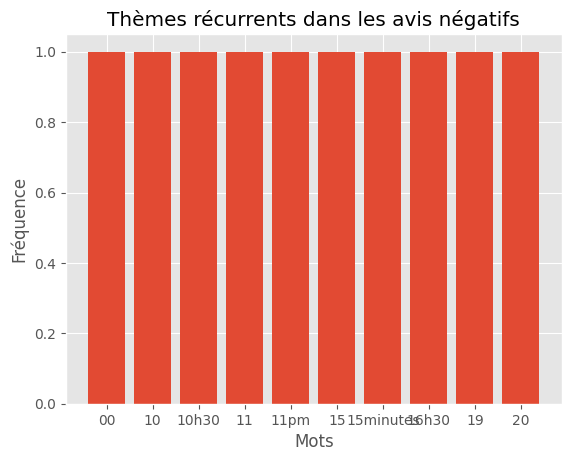

Les recommandations ont été enregistrées dans le fichier recommendations.csv


In [ ]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('review_treated.csv')

# Fonction pour obtenir les avis négatifs
def get_negative_reviews(data):
    return data[data['Sentiment'] == 'Negative']['Review']

# Extraire les avis négatifs
negative_reviews = get_negative_reviews(data)

# Analyser les thèmes récurrents
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_reviews)
word_counts = Counter(vectorizer.get_feature_names_out())

# Afficher les 10 mots les plus fréquents dans les avis négatifs
common_words = word_counts.most_common(10)
print("Mots les plus fréquents dans les avis négatifs:", common_words)

# Proposer des actions concrètes (exemple simple)
recommendations = {
    "service": "Former le personnel pour améliorer l'interaction avec les clients.",
    "qualité": "Assurer un contrôle de qualité plus rigoureux des produits.",
    "attente": "Optimiser les processus pour réduire le temps d'attente des clients.",
}

# Prioriser les recommandations
# Vous pouvez ajuster les critères de priorisation selon vos besoins
priority = {
    "service": 1,   # Impact élevé, faisabilité moyenne
    "qualité": 2,   # Impact moyen, faisabilité élevée
    "attente": 3    # Impact élevé, faisabilité basse
}

# Créer un DataFrame pour les recommandations
df_recommendations = pd.DataFrame(list(recommendations.items()), columns=['Problème', 'Recommandation'])
df_recommendations['Priorité'] = df_recommendations['Problème'].map(priority)

# Trier les recommandations par priorité
df_recommendations.sort_values(by='Priorité', inplace=True)

# Afficher les recommandations
print(df_recommendations)

# Visualiser les thèmes récurrents
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('Thèmes récurrents dans les avis négatifs')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.show()

# Enregistrer les recommandations dans un fichier CSV
df_recommendations.to_csv('recommendations.csv', index=False, encoding='utf-8')

print("Les recommandations ont été enregistrées dans le fichier recommendations.csv")
